
## Personality prediction using ML.

Five Personality Traits (OCEAN)

- Openness to experience (inventive/curious vs. consistent/cautious)
- Conscientiousness (efficient/organized vs. easy-going/careless)
- Extroversion (outgoing/energetic vs. solitary/reserved)
- Agreeableness (friendly/compassionate vs. challenging/detached)
- Neuroticism (sensitive/nervous vs. secure/confident)

Resources: 
- [wikipedia](https://en.wikipedia.org/wiki/Big_Five_personality_traits)
- [ipip.ori.org](https://ipip.ori.org/newBigFive5broadKey.htm)
- [How Accurately Can You Describe Yourself?](https://ipip.ori.org/new_ipip-50-item-scale.htm)
- [Dataset](https://www.kaggle.com/datasets/tunguz/big-five-personality-test)

#### read Codebook

### Dataset Description

Specific questions are asked for each personality trait, and participants must choose between 1 and 5. The scale was labeled between 1 = Disagree, 3 = Neutral, and 5 = Agree. Here EST corresponds to the Extroversion trait, AGR corresponds to the Agreeable Personality, etc.

In [97]:
# lib's
import numpy as np
import pandas as pd
import glob
import random
import time
import pickle

# for ploting
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})

# clustering lib and Visualize the elbow
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer

# For ease of calculation, scale all the values between 0-1 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [2]:
data = pd.read_csv(r'dataset\\data-final.csv', delimiter='\t')
data.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
# df = pd.concat([pd.read_csv(df_path) for df_path in glob.glob(r'dataset\data_final\*.csv')])
# df.reset_index(drop=True, inplace=True)
# df.head()

In [17]:
df = data.copy()
columns = df.columns
print("columns name : ")
for c in columns:
    print(c, end=', ')

EXT1, EXT2, EXT3, EXT4, EXT5, EXT6, EXT7, EXT8, EXT9, EXT10, EST1, EST2, EST3, EST4, EST5, EST6, EST7, EST8, EST9, EST10, AGR1, AGR2, AGR3, AGR4, AGR5, AGR6, AGR7, AGR8, AGR9, AGR10, CSN1, CSN2, CSN3, CSN4, CSN5, CSN6, CSN7, CSN8, CSN9, CSN10, OPN1, OPN2, OPN3, OPN4, OPN5, OPN6, OPN7, OPN8, OPN9, OPN10, EXT1_E, EXT2_E, EXT3_E, EXT4_E, EXT5_E, EXT6_E, EXT7_E, EXT8_E, EXT9_E, EXT10_E, EST1_E, EST2_E, EST3_E, EST4_E, EST5_E, EST6_E, EST7_E, EST8_E, EST9_E, EST10_E, AGR1_E, AGR2_E, AGR3_E, AGR4_E, AGR5_E, AGR6_E, AGR7_E, AGR8_E, AGR9_E, AGR10_E, CSN1_E, CSN2_E, CSN3_E, CSN4_E, CSN5_E, CSN6_E, CSN7_E, CSN8_E, CSN9_E, CSN10_E, OPN1_E, OPN2_E, OPN3_E, OPN4_E, OPN5_E, OPN6_E, OPN7_E, OPN8_E, OPN9_E, OPN10_E, dateload, screenw, screenh, introelapse, testelapse, endelapse, IPC, country, lat_appx_lots_of_err, long_appx_lots_of_err, 

In [18]:
# Select only 50 columns
dfX = df[df.columns[0:50]]
dfX.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [19]:
# Check data info.
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1013558 non-null  float64
 1   EXT2    1013558 non-null  float64
 2   EXT3    1013558 non-null  float64
 3   EXT4    1013558 non-null  float64
 4   EXT5    1013558 non-null  float64
 5   EXT6    1013558 non-null  float64
 6   EXT7    1013558 non-null  float64
 7   EXT8    1013558 non-null  float64
 8   EXT9    1013558 non-null  float64
 9   EXT10   1013558 non-null  float64
 10  EST1    1013558 non-null  float64
 11  EST2    1013558 non-null  float64
 12  EST3    1013558 non-null  float64
 13  EST4    1013558 non-null  float64
 14  EST5    1013558 non-null  float64
 15  EST6    1013558 non-null  float64
 16  EST7    1013558 non-null  float64
 17  EST8    1013558 non-null  float64
 18  EST9    1013558 non-null  float64
 19  EST10   1013558 non-null  float64
 20  AGR1    1013558 non-null

In [20]:
# describe dataset
round(dfX.describe(),2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,...,1013558.00,1013558.00,1013558.0,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,...,3.65,2.08,4.0,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,...,1.16,1.11,1.1,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,...,3.00,1.00,3.0,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,...,4.00,2.00,4.0,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,...,5.00,3.00,5.0,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [21]:
# get unique values from columns
for col in dfX.columns:
    print(f"Unique values in {col} is : {sorted(dfX[col].unique())}")

Unique values in EXT1 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EXT2 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EXT3 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EXT4 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EXT5 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EXT6 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EXT7 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EXT8 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EXT9 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EXT10 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EST1 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EST2 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EST3 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EST4 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EST5 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
Unique values in EST6 is : [0.0, 1.0, 2.0, 3.0, 4.0, 5

In [22]:
# Replace 0 with NaN and Remove NaN
dfX = dfX.replace(0, np.nan).dropna(axis=0).reset_index(drop=True)
dfX.shape

(874434, 50)

- Main data size : 1015341 

- Data size after removing NaN : 874434

- Total row's removed : 140907

# EDA

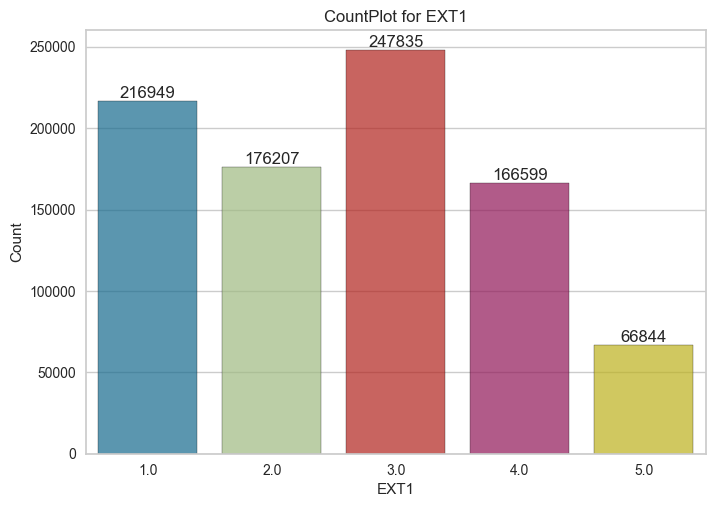

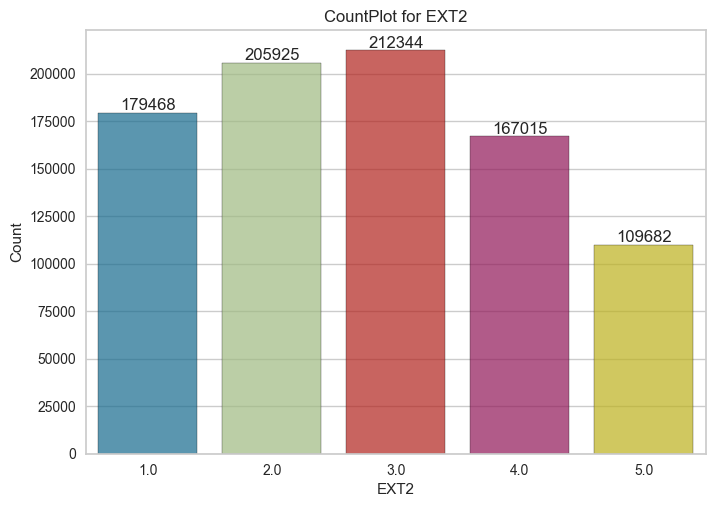

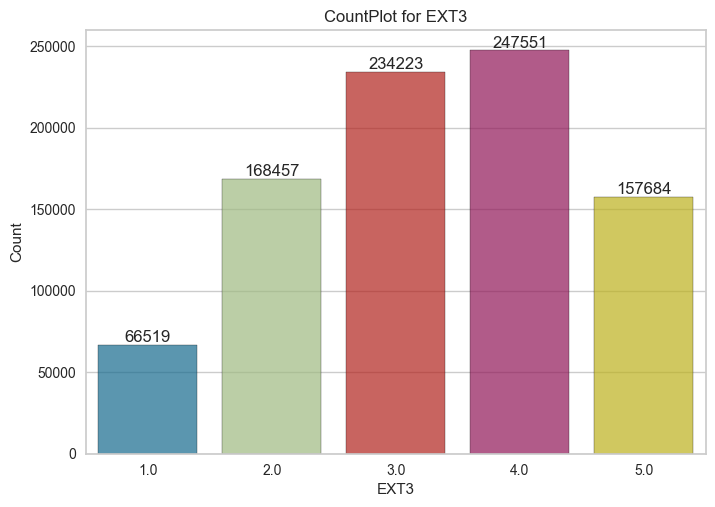

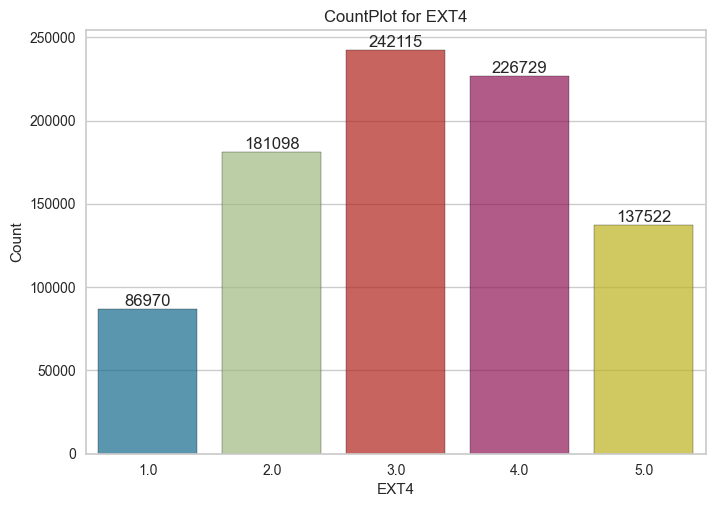

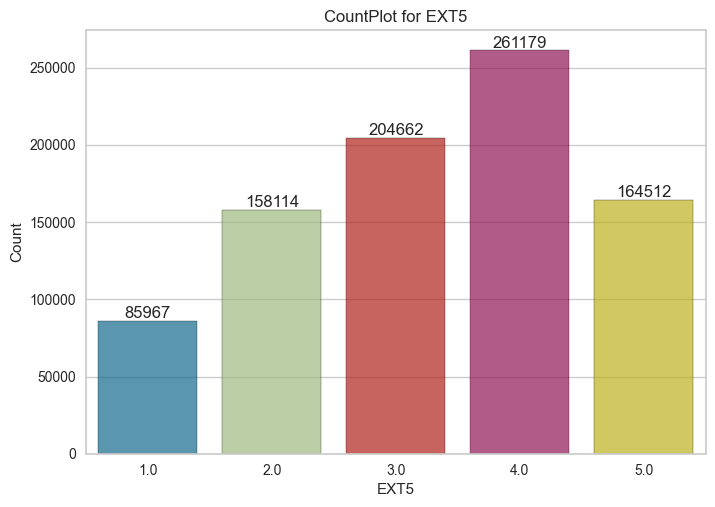

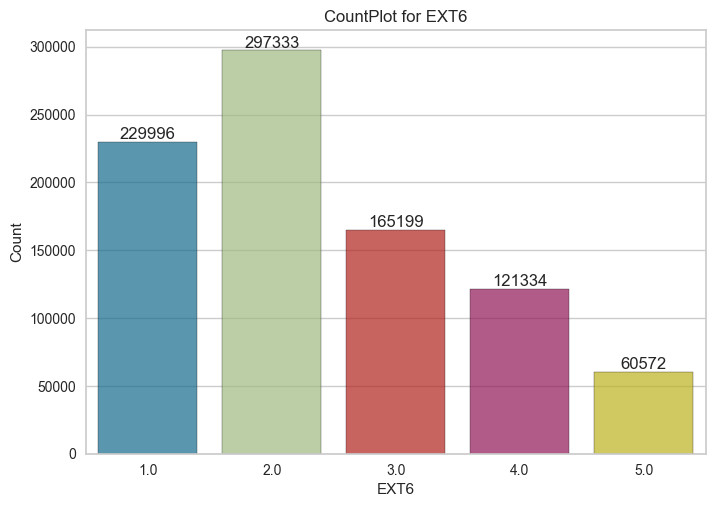

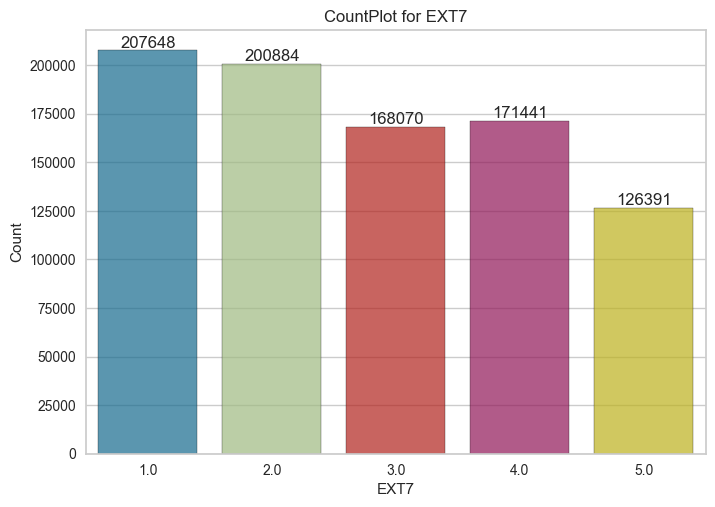

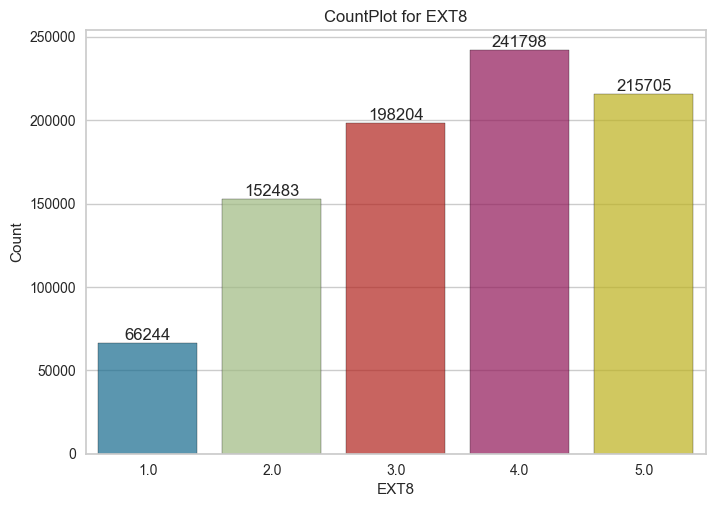

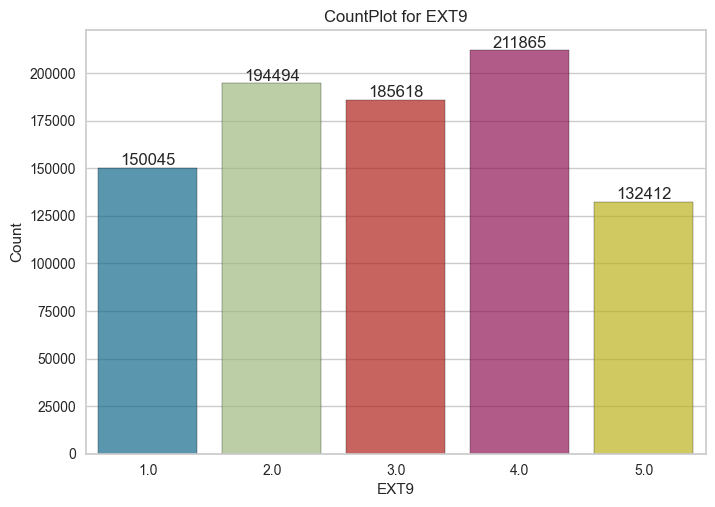

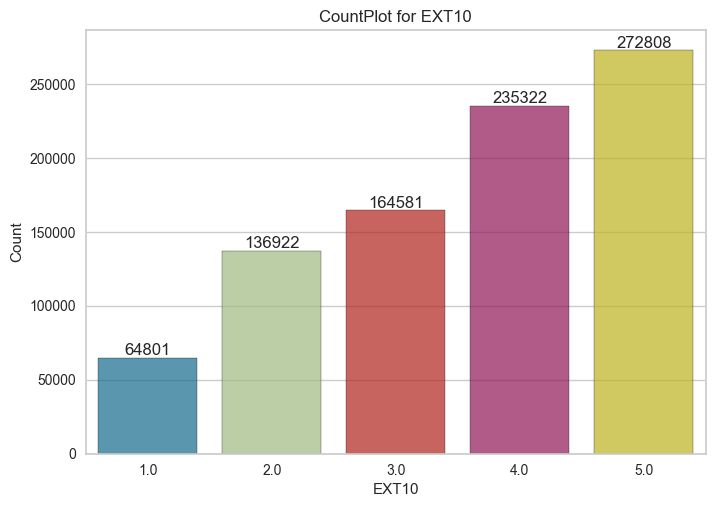

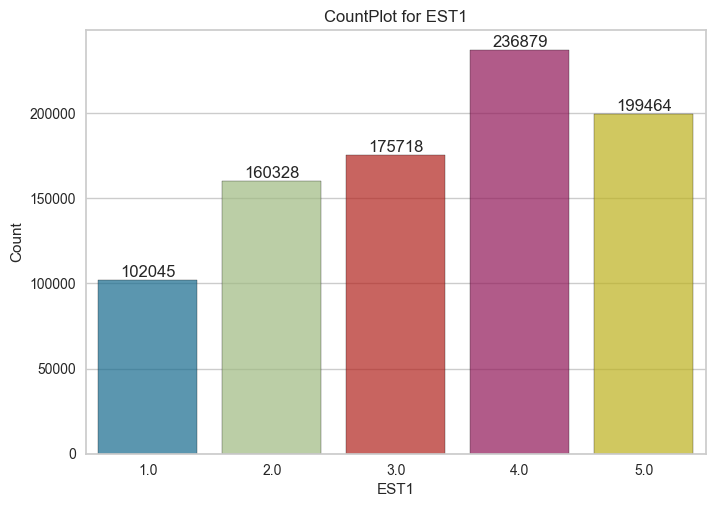

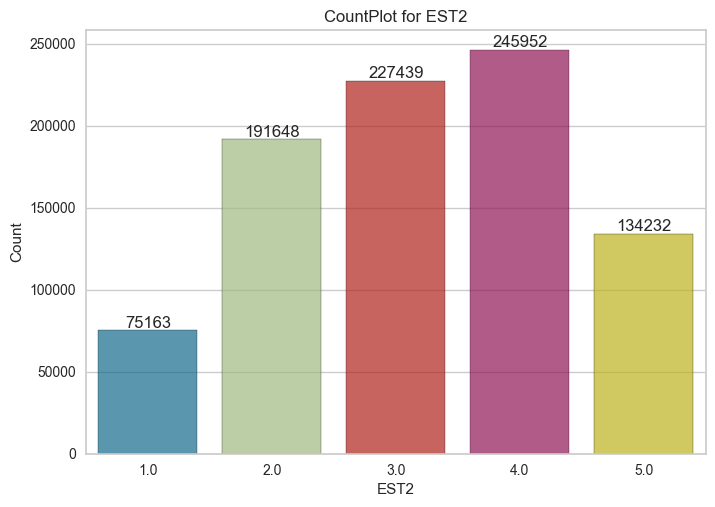

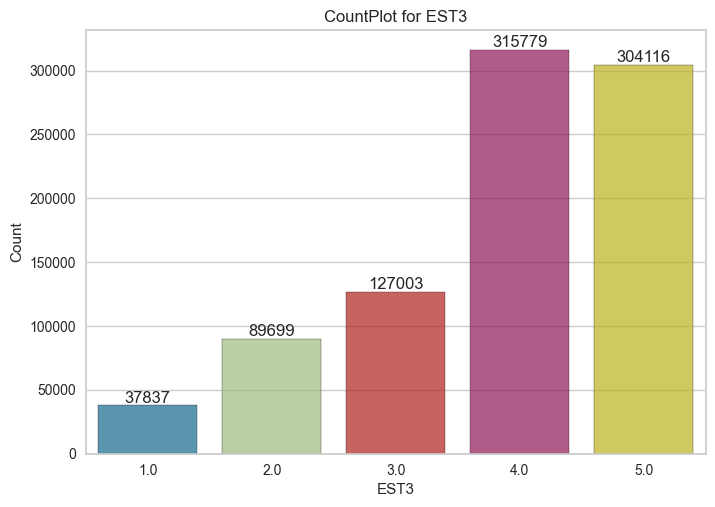

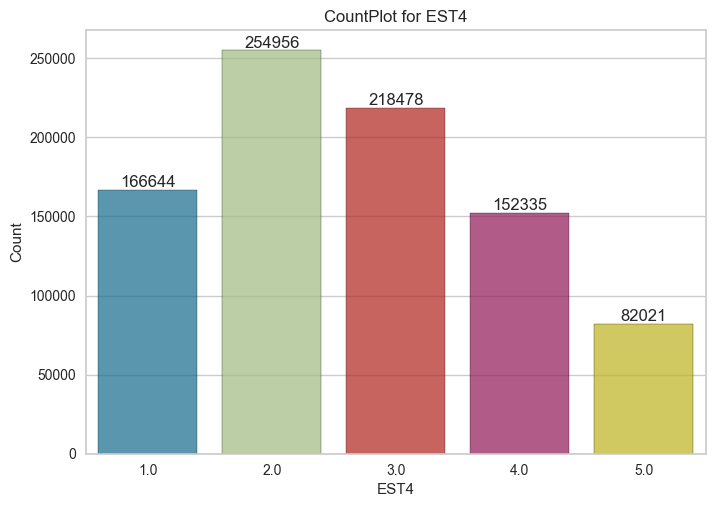

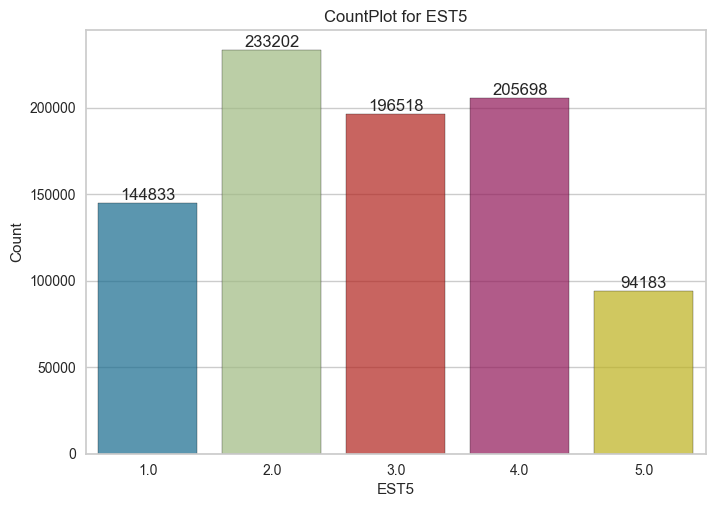

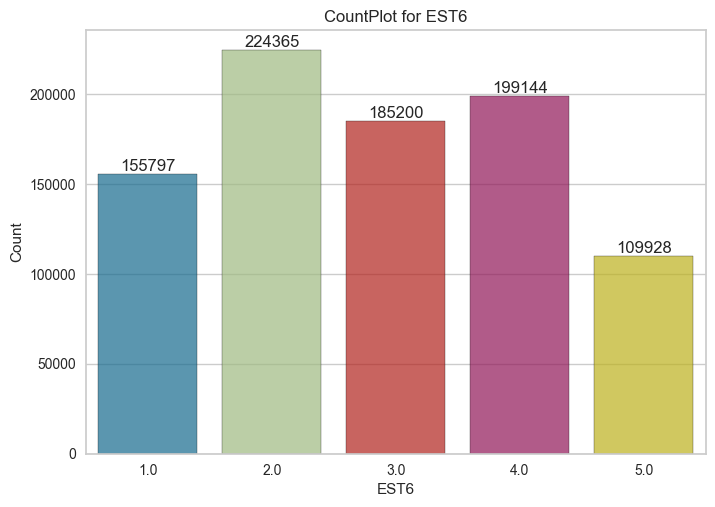

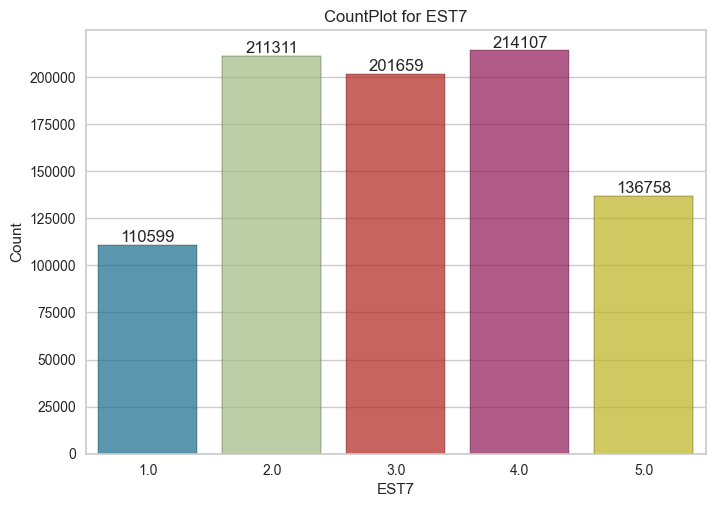

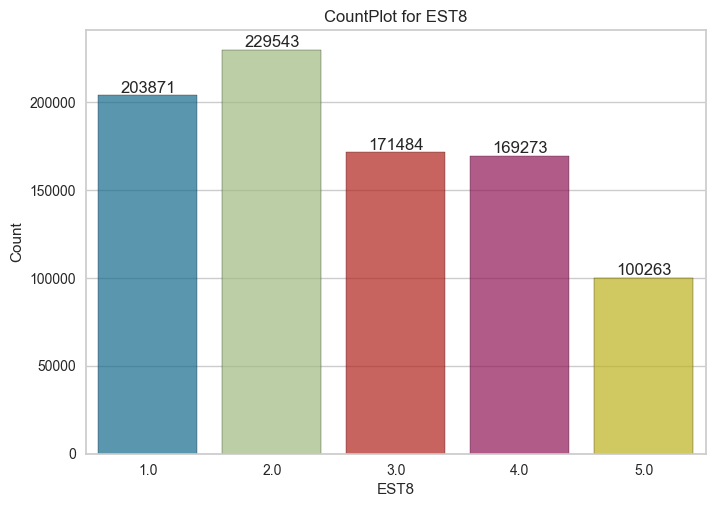

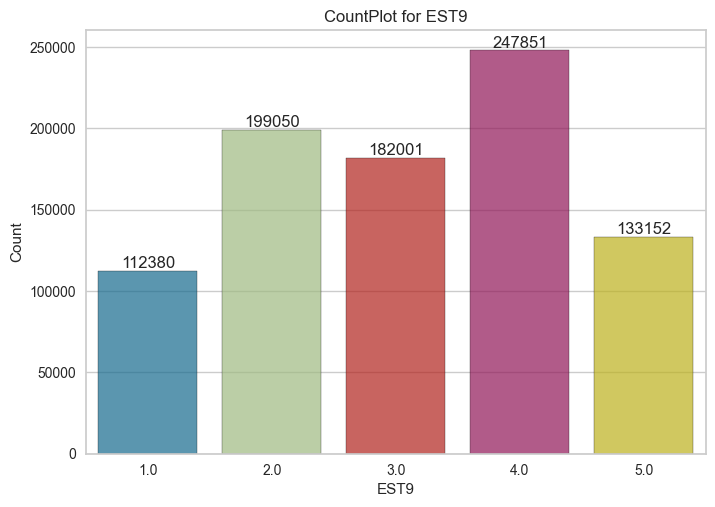

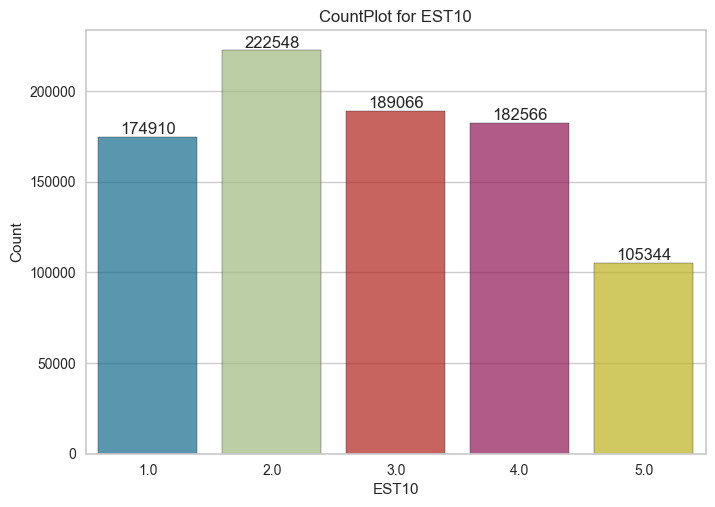

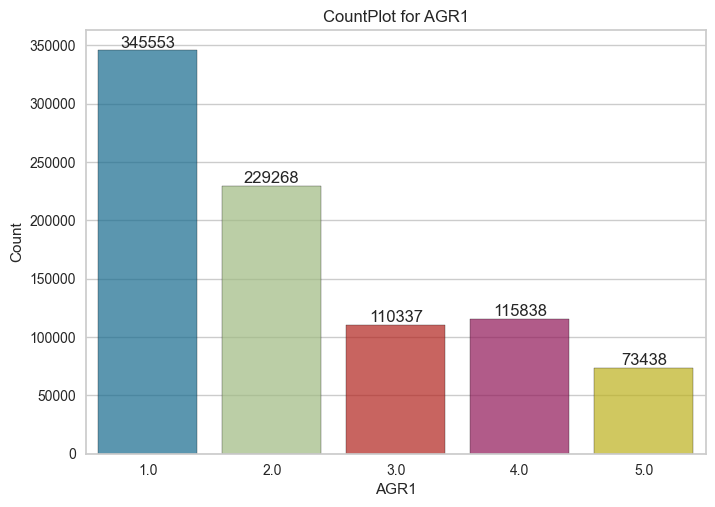

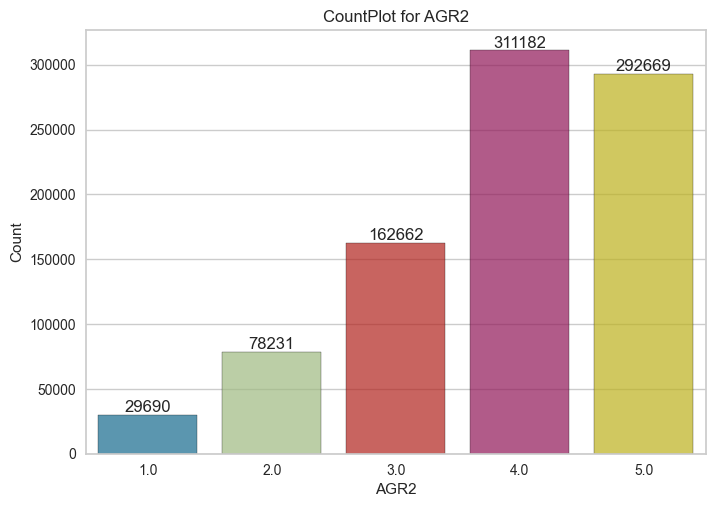

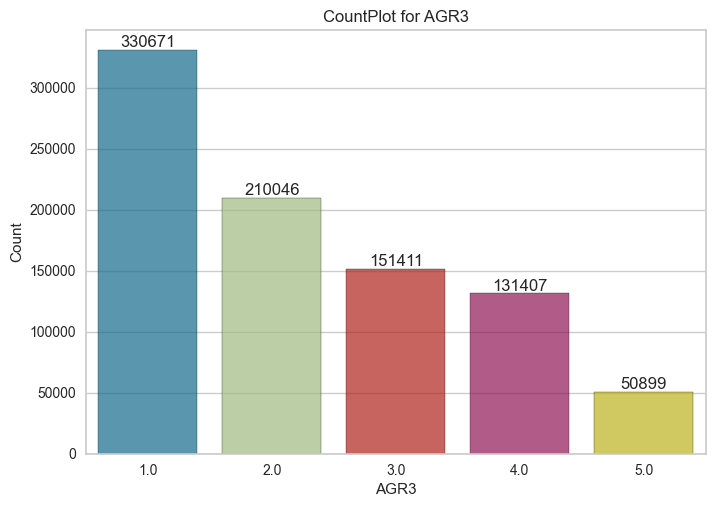

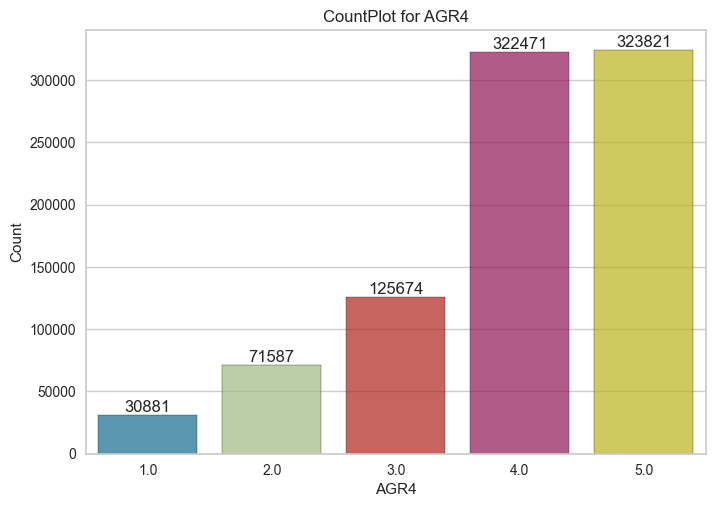

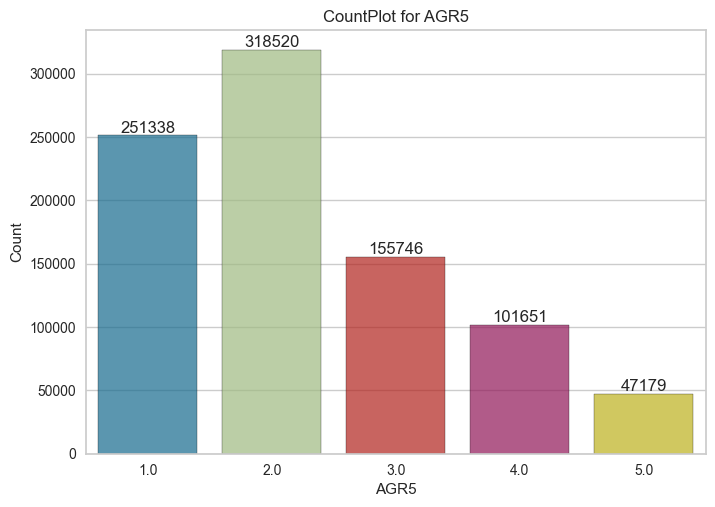

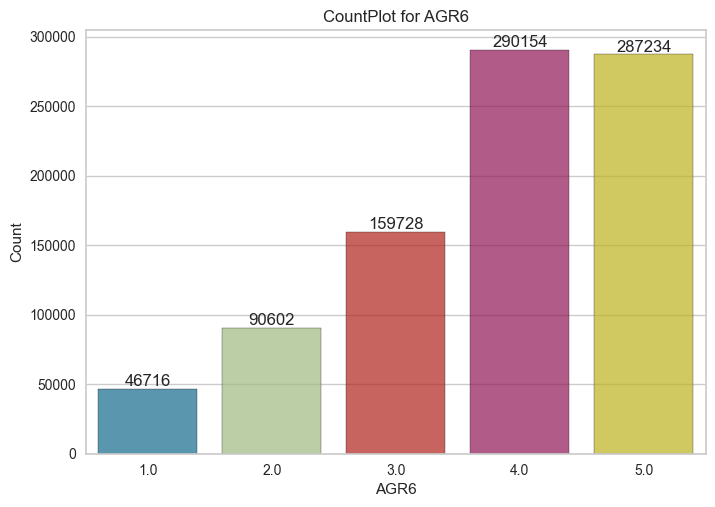

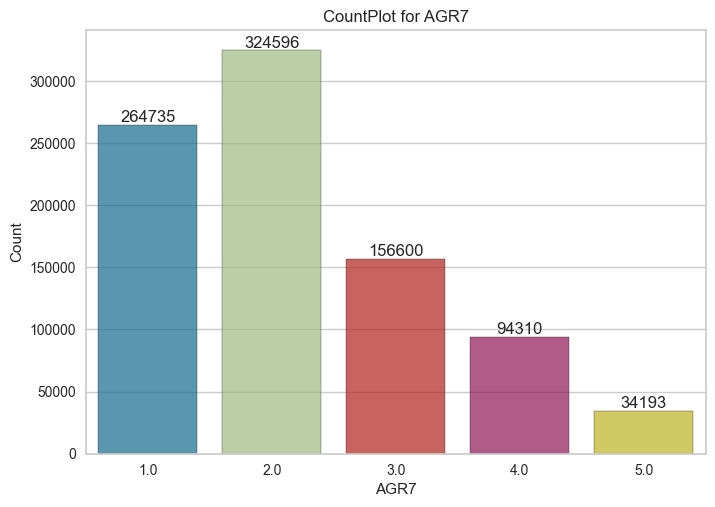

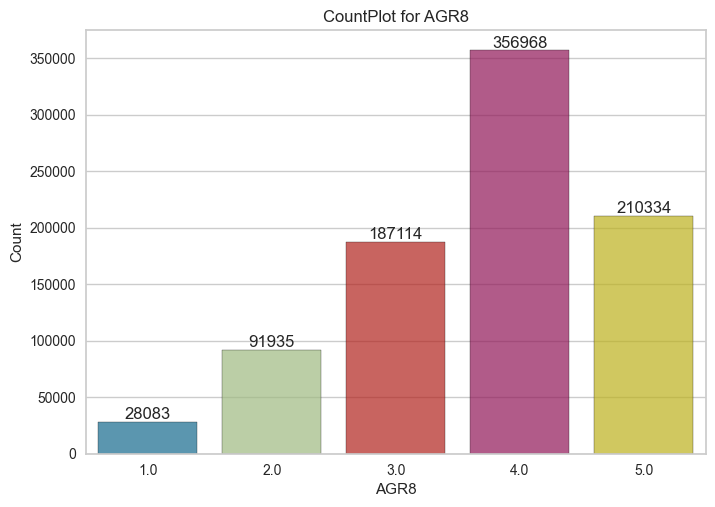

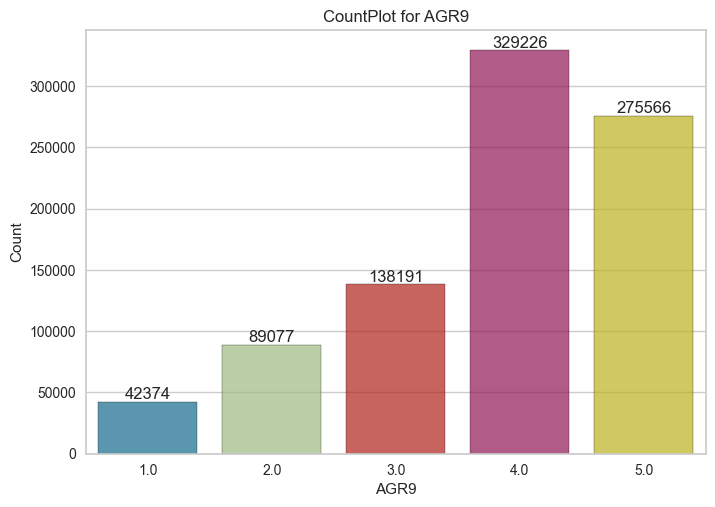

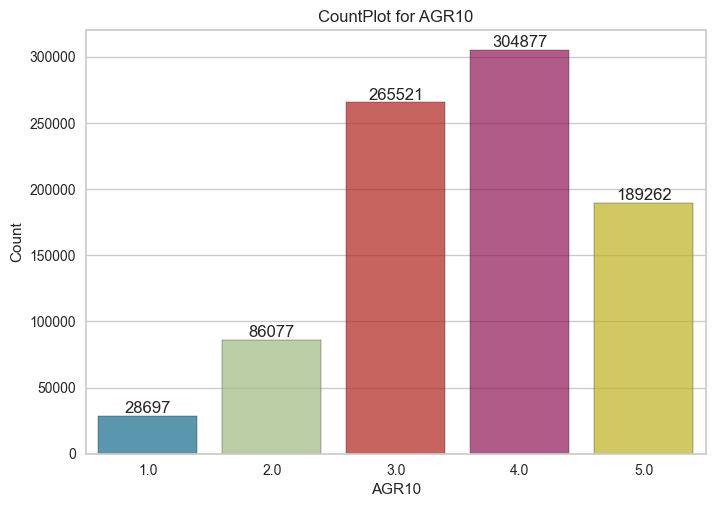

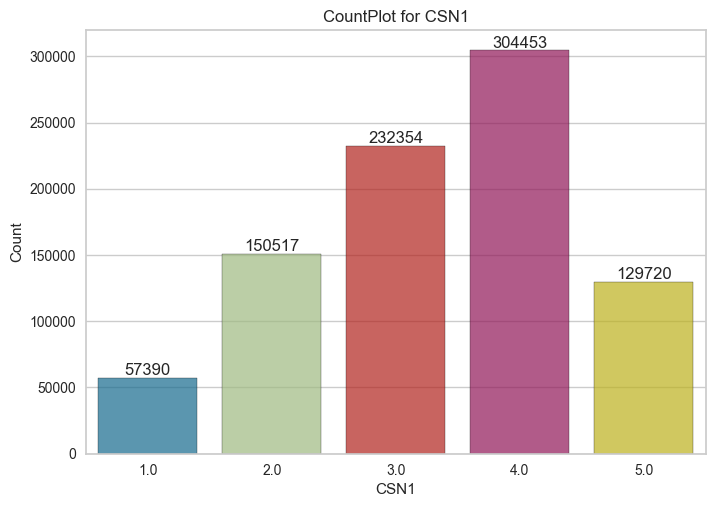

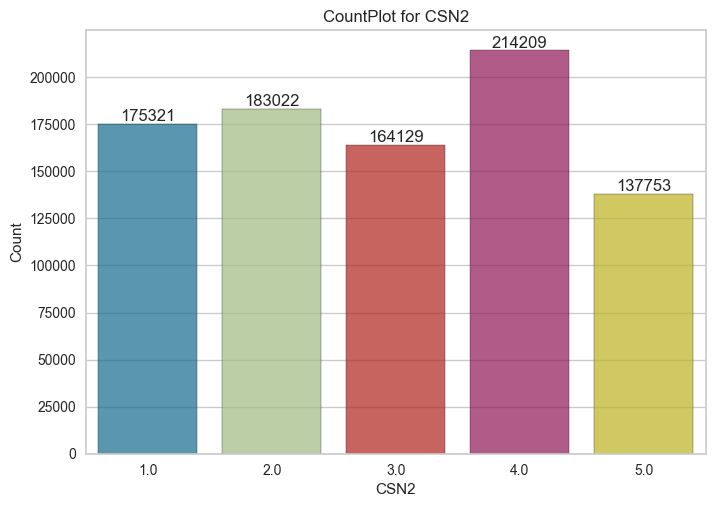

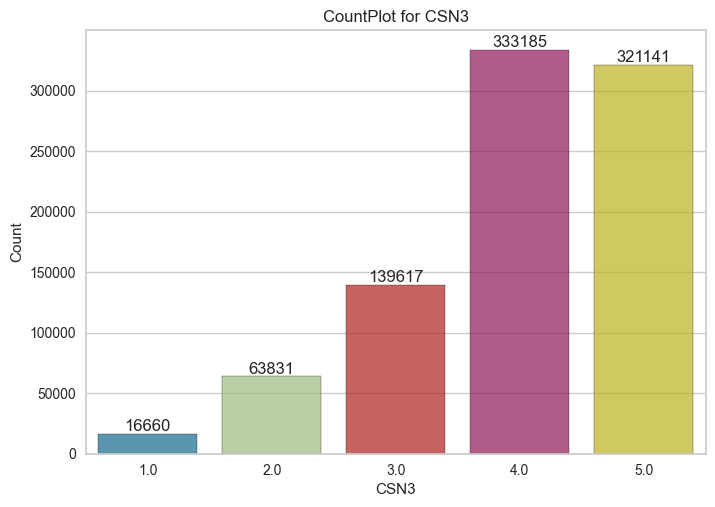

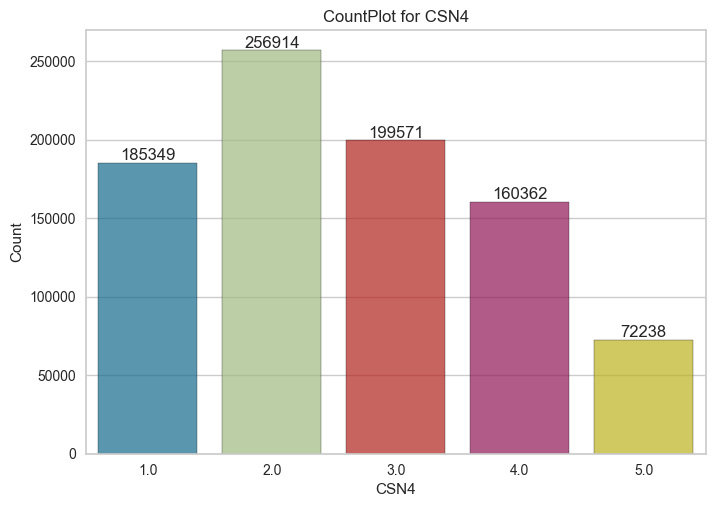

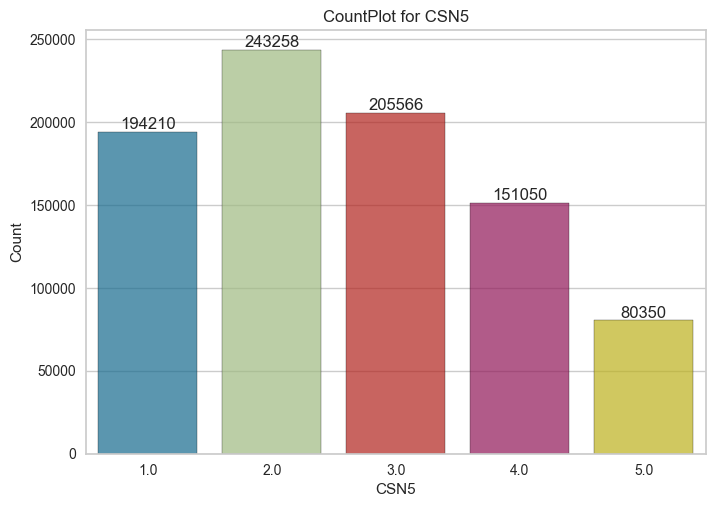

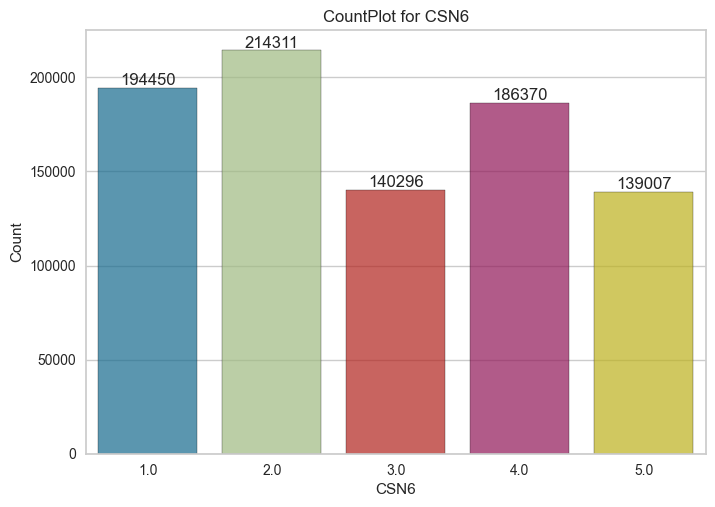

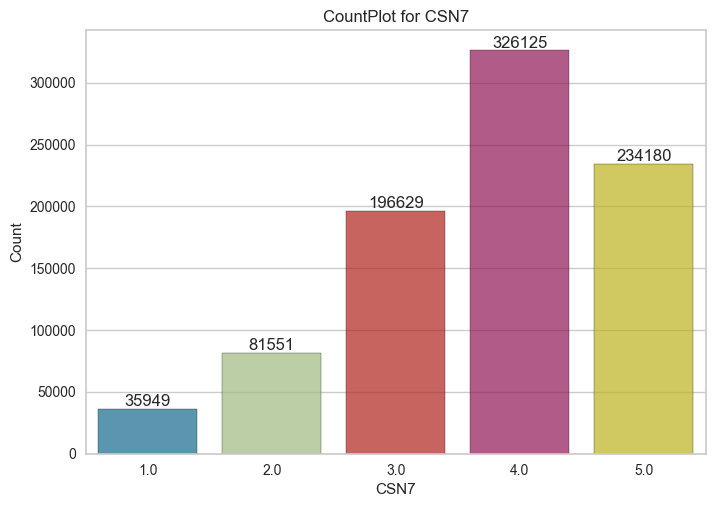

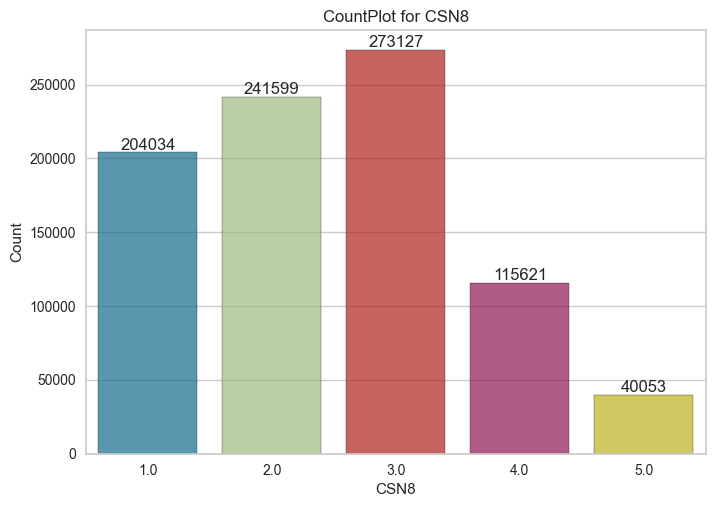

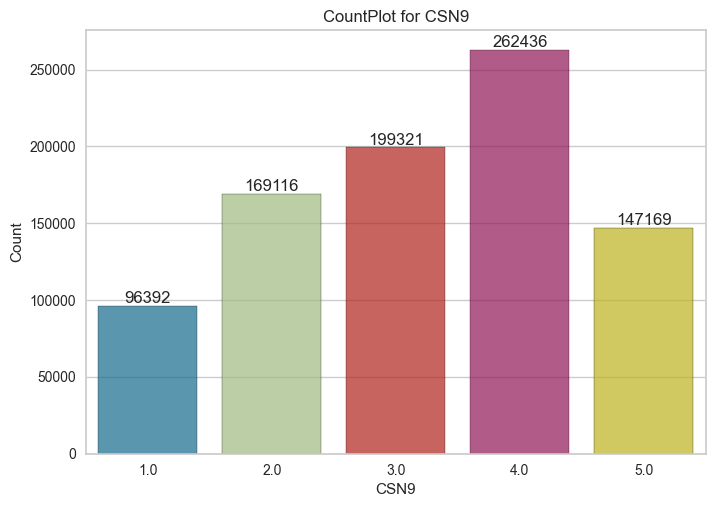

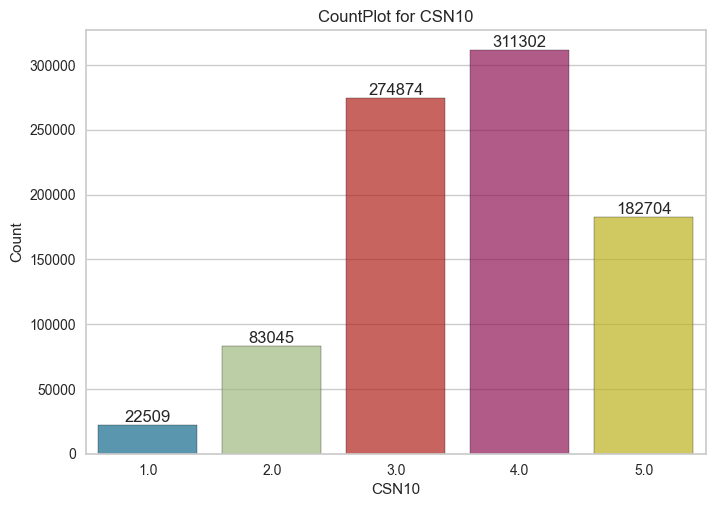

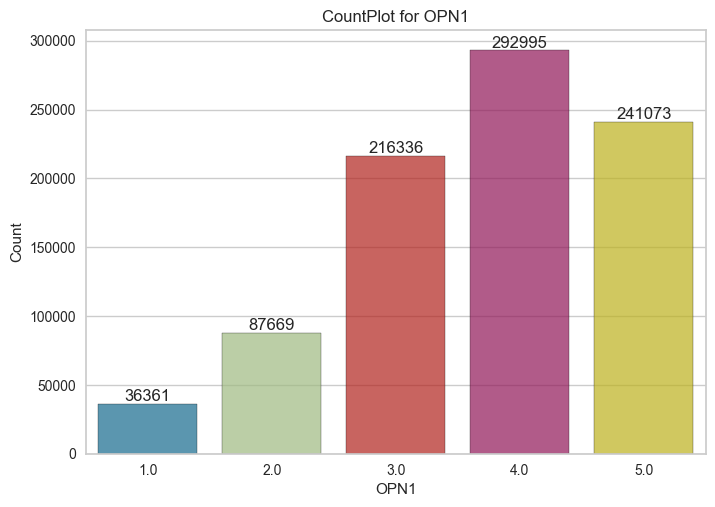

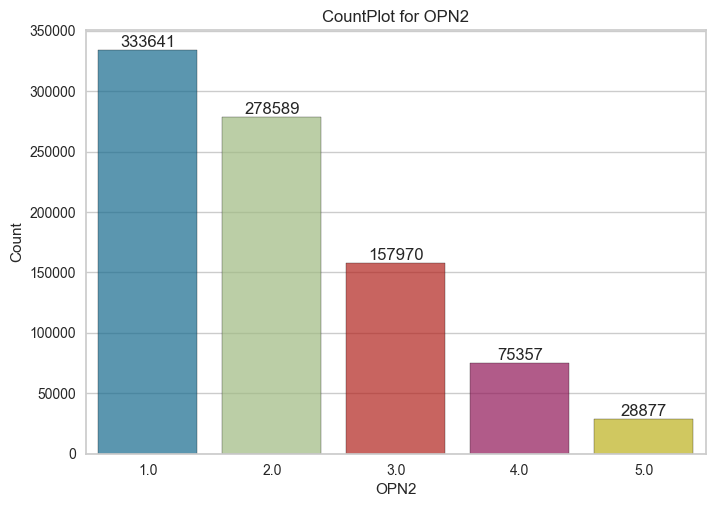

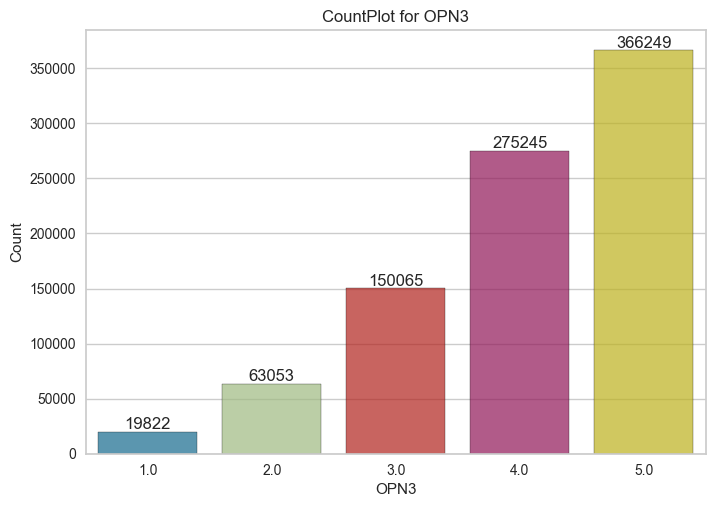

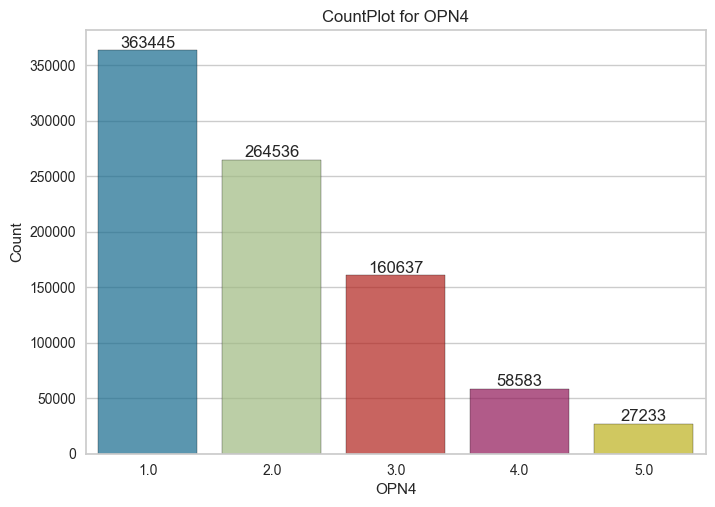

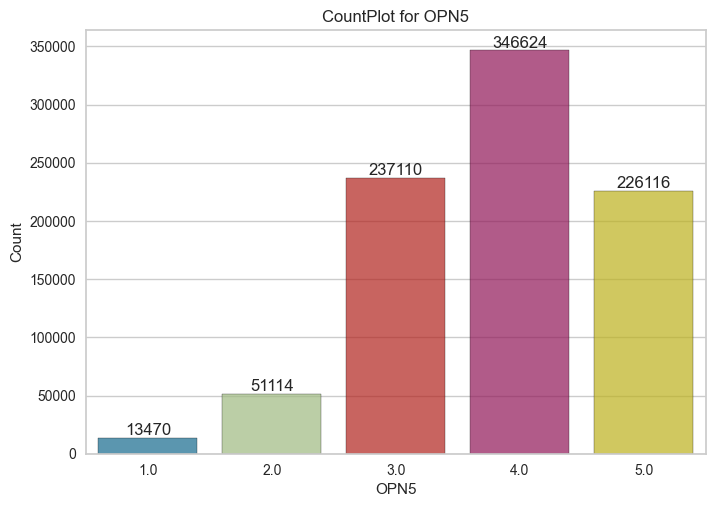

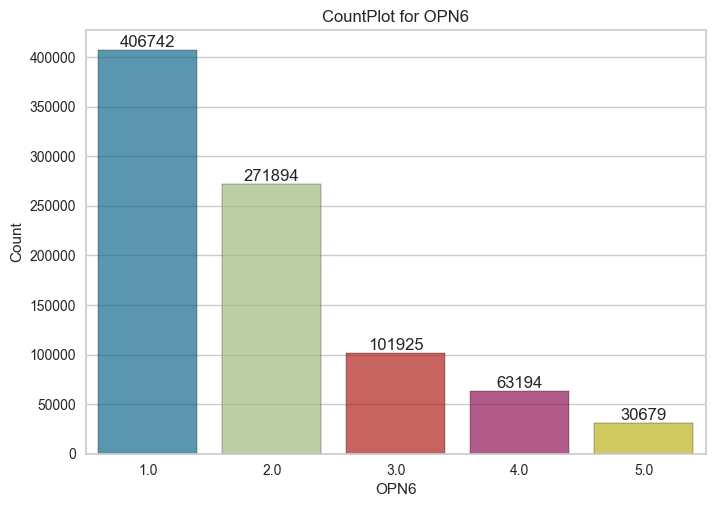

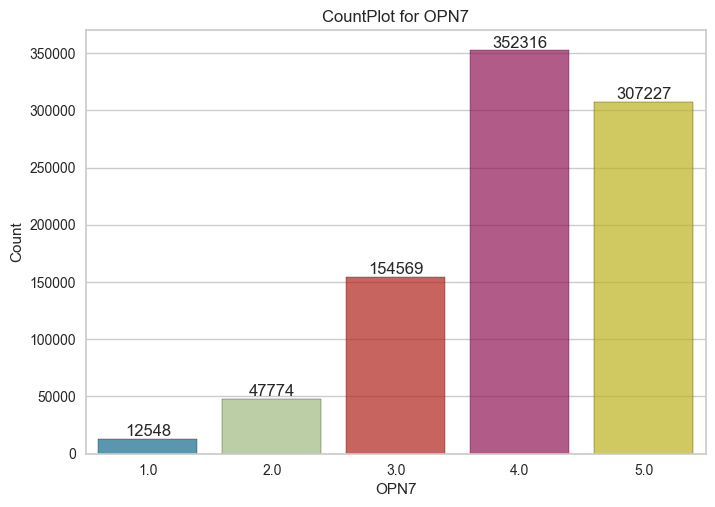

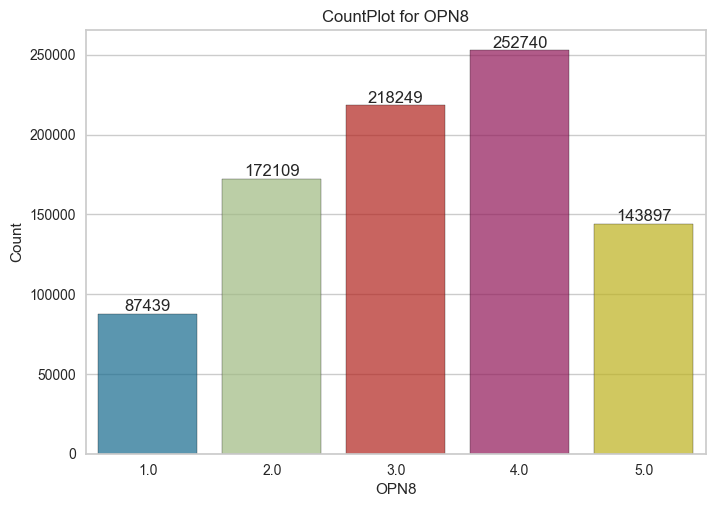

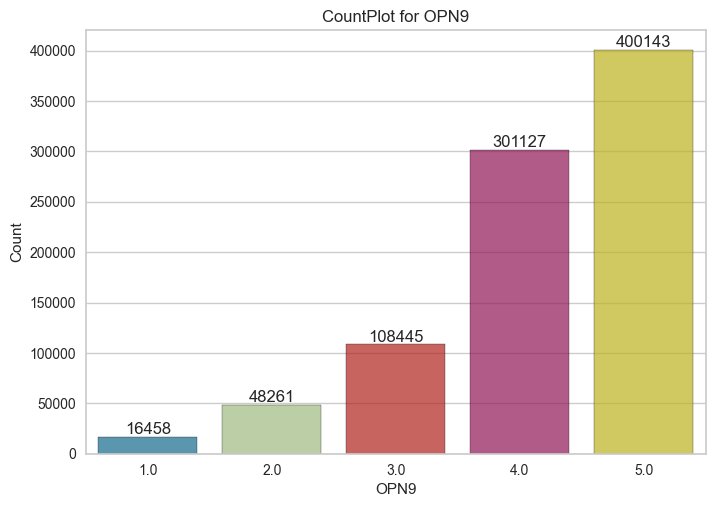

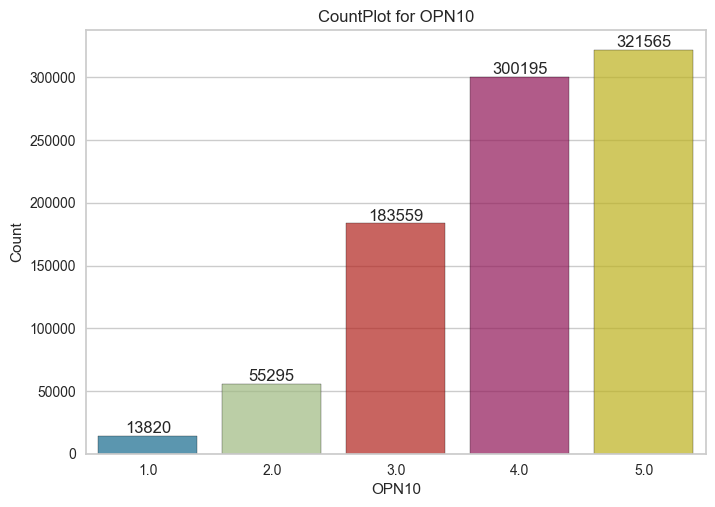

In [23]:
# plot count of choice for each question.
for col in dfX.columns:
    ax = sns.countplot(data=dfX, x=col, edgecolor="black", alpha=0.7)
    plt.title(f'CountPlot for {col}')
    plt.xlabel(f'{col}')
    plt.ylabel(f'Count')
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()
    time.sleep(0.5)

# Feature Engeneering

In [25]:
# get score for each personality
dfX['EXT_rank'] = dfX['EXT1'] - dfX['EXT2'] + dfX['EXT3'] - dfX['EXT4'] + dfX['EXT5'] - dfX['EXT6'] + dfX['EXT7'] - dfX['EXT8'] + dfX['EXT9'] - dfX['EXT10']
dfX['EST_rank'] = dfX['EST1'] - dfX['EST2'] + dfX['EST3'] - dfX['EST4'] + dfX['EST5'] + dfX['EST6'] + dfX['EST7'] + dfX['EST8'] + dfX['EST9'] + dfX['EST10']
dfX['AGR_rank'] = - dfX['AGR1'] + dfX['AGR2'] - dfX['AGR3'] + dfX['AGR4'] - dfX['AGR5'] + dfX['AGR6'] - dfX['AGR7'] + dfX['AGR8'] + dfX['AGR9'] + dfX['AGR10']
dfX['CSN_rank'] = dfX['CSN1'] - dfX['CSN2'] + dfX['CSN3'] - dfX['CSN4'] + dfX['CSN5'] - dfX['CSN6'] + dfX['CSN7'] - dfX['CSN8'] + dfX['CSN9'] + dfX['CSN10']
dfX['OPN_rank'] = dfX['OPN1'] - dfX['OPN2'] + dfX['OPN3'] - dfX['OPN4'] + dfX['OPN5'] - dfX['OPN6'] + dfX['OPN7'] + dfX['OPN8'] + dfX['OPN9'] + dfX['OPN10']

In [27]:
dfX.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN6,OPN7,OPN8,OPN9,OPN10,EXT_rank,EST_rank,AGR_rank,CSN_rank,OPN_rank
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,5.0,3.0,4.0,5.0,16.0,12.0,15.0,8.0,27.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,4.0,2.0,5.0,3.0,-10.0,13.0,20.0,13.0,17.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2.0,5.0,3.0,4.0,4.0,-5.0,14.0,18.0,10.0,23.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1.0,4.0,4.0,3.0,3.0,-4.0,17.0,14.0,1.0,21.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,3.0,5.0,5.0,-1.0,7.0,22.0,24.0,30.0


In [33]:
# make data copy for qsn and score
df_qsn = dfX[dfX.columns[0:50]]
df_score = dfX[dfX.columns[50:]]

In [35]:
df_qsn.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [36]:
df_score.head()

,EXT_rank,EST_rank,AGR_rank,CSN_rank,OPN_rank
0,16.0,12.0,15.0,8.0,27.0
1,-10.0,13.0,20.0,13.0,17.0
2,-5.0,14.0,18.0,10.0,23.0
3,-4.0,17.0,14.0,1.0,21.0
4,-1.0,7.0,22.0,24.0,30.0


In [38]:
# describe score dataset
round(df_score.describe(),2)

,EXT_rank,EST_rank,AGR_rank,CSN_rank,OPN_rank
count,874434.00,874434.00,874434.00,874434.00,874434.00
mean,-0.41,18.67,13.74,9.66,20.99
std,9.10,8.59,7.29,7.37,6.30
min,-20.00,-2.00,-14.00,-14.00,-8.00
25%,-7.00,12.00,9.00,5.00,17.00
50%,0.00,19.00,15.00,10.00,21.00
75%,6.00,25.00,19.00,15.00,26.00
max,20.00,38.00,26.00,26.00,32.00


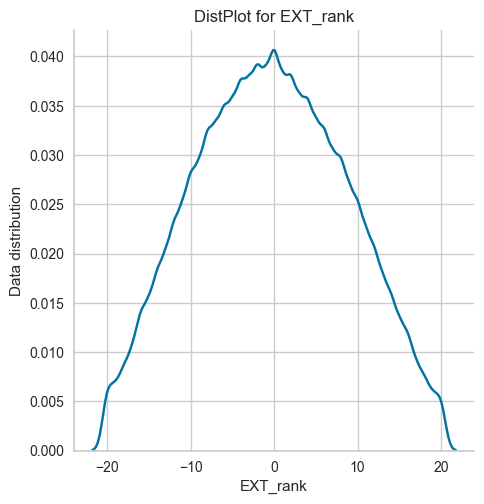

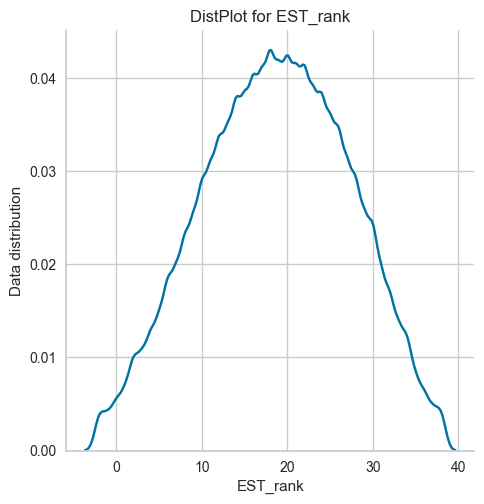

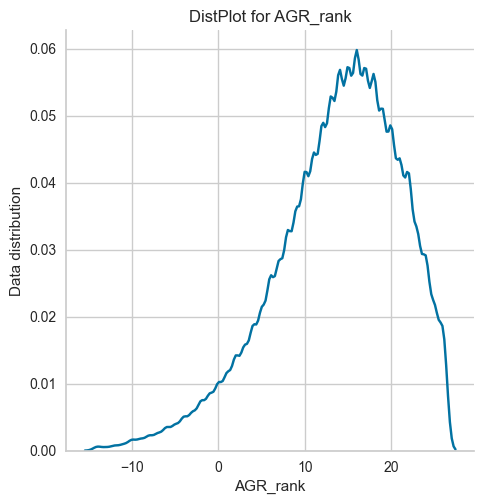

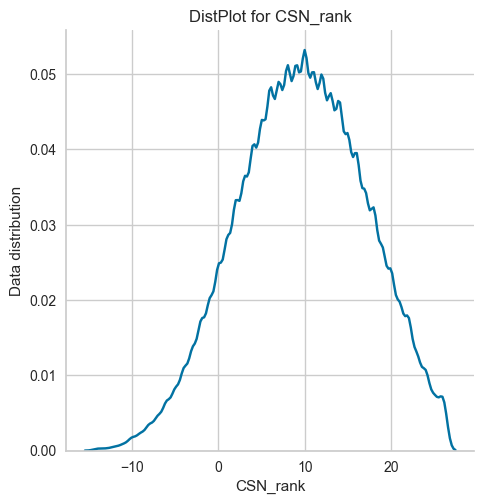

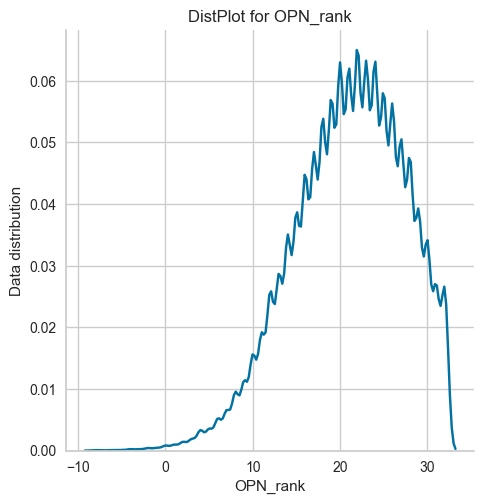

In [41]:
# check data distribution
for col in df_score.columns:
    sns.displot(data=df_score, x=col, kind="kde")
    plt.title(f'DistPlot for {col}')
    plt.xlabel(f'{col}')
    plt.ylabel(f'Data distribution')
    plt.show()

# Apply WCSS |  Elbow Method 

#### tested with first `10000` records in `df_sample`

In [74]:
wcss = [] 
df_sample = df_qsn[:10000]
for i in range(2, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 41)  
    kmeans.fit(df_sample) 
    wcss.append(kmeans.inertia_)
    print(f"{i} : {kmeans.inertia_}")
#     time.sleep(1)

2 : 616480.2638422359
3 : 585675.8336070945
4 : 564896.3330672599
5 : 549532.041016802
6 : 539232.0977939733
7 : 529837.7968224876
8 : 521509.1983687032
9 : 514616.76043509046
10 : 508602.995241309
11 : 502842.15975564084
12 : 498576.64653205837
13 : 494651.6911026313
14 : 490948.88187609473


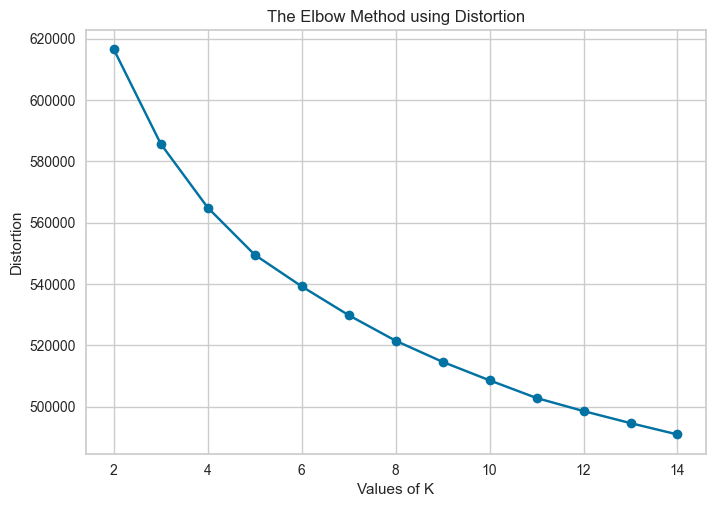

In [75]:
plt.plot(range(2, 15), wcss, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

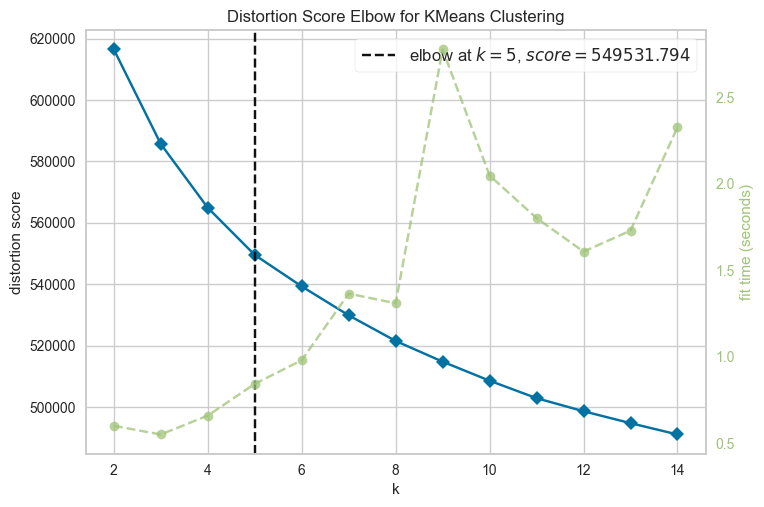

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(df_sample) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

# -->  k point can be `5`

# Build and save model

In [104]:
# Build model
df_sample = df_qsn[:10000]
kmeans = KMeans(n_clusters=5, init='k-means++')
k_fit = kmeans.fit(df_sample)

df_qsn['Clusters'] = k_fit.predict(df_qsn)
df_qsn.to_csv('artifact\\df_qsn_5_cluster.csv', index=False)

df_score['Clusters'] = df_qsn['Clusters'] # k_fit.predict(df_qsn)
df_score.to_csv('artifact\\df_score_5_cluster.csv', index=False)

# Save model
filename = "artifact\\model\\k_mean_Personality.pkl"
pickle.dump(k_fit, open(filename, 'wb'))


# Personality prediction using ML on labeled dataset

In [102]:
pp_data = pd.read_csv('artifact\\df_qsn_5_cluster.csv')
pp_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,3
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,3


In [103]:
pp_data_score = pd.read_csv('artifact\\df_score_5_cluster.csv')
pp_data_score.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,3
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,3


In [ ]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 11)
    kmeans.fit(df_sample) 
    wcss.append(kmeans.inertia_)
    print(f"{i} : {kmeans.inertia_}")
    time.sleep(1)

In [ ]:
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df_sample) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [ ]:
# MiniBatchKMeans clustering -- in unsupervised learning algorithms

kmeans = MiniBatchKMeans(n_clusters=5, random_state=0, batch_size=1000, max_iter=100).fit(data)

# n_clusters : number of personality type (in our case its 10 -- you can change it with any number of cluster)
# random_state : change as you want
# batch_size : the amount of data that is going to train at once or one at a time (feed the data in batches)
# max_iter : train the data at n times (in our case its 100 times)

In [ ]:
# to check the number of cluster after model train

len(kmeans.cluster_centers_)

In [ ]:
# to find personality types -- most common answer of each type or common answer pattern

one = kmeans.cluster_centers_[0]
two = kmeans.cluster_centers_[1]
three =kmeans.cluster_centers_[2]
four = kmeans.cluster_centers_[3]
five =kmeans.cluster_centers_[4]


In [ ]:
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five}  

all_types_scores ={}

for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] - personality_type[9]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['agreeableness_score'] =  -personality_type[0] + personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['openness_score'] =  personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    
    all_types_scores[name] = personality_trait

In [ ]:
all_types_scores

In [ ]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])
    

In [ ]:
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))

In [ ]:
all_extroversion_normalized, len(all_extroversion_normalized)

In [ ]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

In [ ]:
normalized_all_types_scores

In [ ]:
for k in all_types.keys():

    plt.figure(figsize=(15,5))
    plt.ylim(0, 1)
    plt.bar(list(normalized_all_types_scores[k].keys()), normalized_all_types_scores[k].values(), color='b')
    plt.title(f"Score of personality type '{k.upper()}' ", size=18)
    plt.show()

In [ ]:
X

In [ ]:
data

In [ ]:
Y = kmeans.predict(data)

In [ ]:
Y, len(Y)

In [ ]:
df_with_labels = pd.DataFrame(X, columns=X.columns)
df_with_labels['personality_type'] = Y
df_with_labels

In [ ]:
# Visualizing the Cluster Predictions

# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = Y
df_pca.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set1', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [ ]:
# Visualizing the Cluster Predictions

# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(X)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Clusters'] = Y
df_pca.head()

In [ ]:
df_pca_1 = df_pca # [:5000]

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_pca_1, x='PCA1', y='PCA2', z='PCA3', color='Clusters')
fig.show()

In [ ]:
# Implementing the Model to See My Personality
columns = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 
           'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 
           'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 
           'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 
           'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

val1 = [random.randint(0,5) for ind in range(10)]
val2 = [random.randint(0,5) for ind in range(10)]
val3 = [random.randint(0,5) for ind in range(10)]
val4 = [random.randint(0,5) for ind in range(10)]
val5 = [random.randint(0,5) for ind in range(10)]
val = val1+val2+val3+val4+val5
len(val)

In [ ]:
my_data = pd.DataFrame(data=[val], columns=columns)
my_data

In [ ]:
my_data1 = scaler.transform(my_data)
my_data1

In [ ]:
my_personality = kmeans.predict(my_data1)
print('My Personality Type Cluster is : ', my_personality)

In [ ]:
# Summing up the my question groups
col_list = list(my_data)

ext = list(my_data1[0][0:10])
est = list(my_data1[0][10:20])
agr = list(my_data1[0][20:30])
csn = list(my_data1[0][30:40])
opn = list(my_data1[0][40:50])

extroversion = round(ext[0] - ext[1] + ext[2] - ext[3] + ext[4] - ext[5] + ext[6] - ext[7] + ext[8] - ext[9], 2)
neurotic = round(est[0] - est[1] + est[2] - est[3] + est[4] + est[5] + est[6] + est[7] + est[8] + est[9], 2)
agreeable = round(-agr[0] + agr[1] - agr[2] + agr[3] - agr[4] - agr[5] + agr[6] - agr[7] + agr[8] + agr[9], 2)
conscientious = round(csn[0] - csn[1] + csn[2] - csn[3] + csn[4] - csn[5] + csn[6] - csn[7] + csn[8] + csn[9], 2)
open_ = round(opn[0] - opn[1] + opn[2] - opn[3] + opn[4] - opn[5] + opn[6] + opn[7] + opn[8] + opn[9], 2)

li = [extroversion, neurotic, agreeable, conscientious, open_]
scaled_data = (li - min(li)) / (max(li) - min(li))

my_sums = pd.DataFrame([scaled_data], 
                       columns=['extroversion', 'neurotic', 'agreeable', 'conscientious', 'open'])

my_sums['cluster'] = my_personality

print('Sum of my question groups')
my_sums

In [ ]:
plt.figure(figsize=(15,5))
# plt.ylim(0, 1)
x_ax = my_sums.columns[:-1]
y_ax = my_sums.values[0][:-1]
plt.bar(x_ax, y_ax, color='b')
plt.title(f"Score of your personality type ", size=18)
plt.show()

In [ ]:
import pickle

# save the MinMaxScaler to disk
filename = 'MinMaxScaler_for_personality_type.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [ ]:
# save the Module to disk
filename = 'personality_type_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

In [ ]:
loaded_scaler = pickle.load(open('MinMaxScaler_for_personality_type.pkl', 'rb')) 
loaded_model = pickle.load(open('personality_type_model.pkl', 'rb')) 

# Implementing the Model to See My Personality
columns = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 
           'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 
           'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 
           'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 
           'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

val1 = [random.randint(0,2) for ind in range(10)]
val2 = [random.randint(0,2) for ind in range(10)]
val3 = [random.randint(0,2) for ind in range(10)]
val4 = [random.randint(0,2) for ind in range(10)]
val5 = [random.randint(0,2) for ind in range(10)]
val = val1+val2+val3+val4+val5
print('length of val : ',len(val), val)

my_data = pd.DataFrame(data=[val], columns=columns)
my_data1 = loaded_scaler.transform(my_data)

my_personality = loaded_model.predict(my_data1)
print('My Personality Type Cluster is : ', my_personality)

# Summing up the my question groups
col_list = list(my_data)

ext = list(my_data1[0][0:10])
est = list(my_data1[0][10:20])
agr = list(my_data1[0][20:30])
csn = list(my_data1[0][30:40])
opn = list(my_data1[0][40:50])

extroversion = ext[0] - ext[1] + ext[2] - ext[3] + ext[4] - ext[5] + ext[6] - ext[7] + ext[8] - ext[9]
neurotic = est[0] - est[1] + est[2] - est[3] + est[4] + est[5] + est[6] + est[7] + est[8] + est[9]
agreeable = -agr[0] + agr[1] - agr[2] + agr[3] - agr[4] - agr[5] + agr[6] - agr[7] + agr[8] + agr[9]
conscientious = csn[0] - csn[1] + csn[2] - csn[3] + csn[4] - csn[5] + csn[6] - csn[7] + csn[8] + csn[9]
open_ = opn[0] - opn[1] + opn[2] - opn[3] + opn[4] - opn[5] + opn[6] + opn[7] + opn[8] + opn[9]

li = [extroversion, neurotic, agreeable, conscientious, open_]
scaled_data = (li - min(li)) / (max(li) - min(li))

my_sums = pd.DataFrame([scaled_data], 
                       columns=['extroversion', 'neurotic', 'agreeable', 'conscientious', 'open'])

my_sums['cluster'] = my_personality

print('Sum of my question groups')
my_sums

In [ ]:
plt.figure(figsize=(15,5))
# plt.ylim(0, 1)
x_ax = my_sums.columns[:-1]
y_ax = my_sums.values[0][:-1]
plt.bar(x_ax, y_ax, color='b')
plt.title(f"Score of your personality type ", size=18)
plt.show()